# The Butterfly Effect

In the last workbook, we discussed how we could predict the movement of a pendulum or a spring using a deterministic model. At the end, we considered what might happen if we attach a second pendulum to the end of the first one. As it turns out, a lot happens!

The system was very sensitive to its initial conditions. Unlike a single pendulum, a small change in the initial conditions led to a large change in the observed behaviour. Even though we know exactly how the system evolves - it's still governed by two pendulum equations! - any error in measuring the initial conditions means that our model will be too wrong to be useful after a while. This is called *chaos*.

This is especially relevant in weather modelling. Whilst we broadly understand the physics behind weather modeling well, there will always be an error in how we measure or store input data from the real world. As such, any weather forecast is only useful for a short period of time, and no weather forecast will ever perfectly predict the weather forever. 

The Lorenz 63 system is a set of three coupled nonlinear ordinary differential equations (ODEs) originally developed by Edward Lorenz in 1963 to study atmospheric convection. The equations provide a simplified model for convective fluid motion. Despite their simplicity, these equations exhibit chaotic behavior, making them a cornerstone example in the study of chaos theory.

\begin{aligned}
\frac{dx}{dt} &= \sigma (y - x), \\
\frac{dy}{dt} &= x(\rho - z) - y, \\
\frac{dz}{dt} &= xy - \beta z.
\end{aligned}


- $x, y, z$: Variables representing the state of the system at any given time.
-  $\sigma$ (Prandtl number): Describes the fluid properties and relates to viscous forces.
- $\rho$ (Rayleigh number): Measures the temperature difference across the fluid layer.
- $\beta$: Relates to the geometric aspects of the system, like the aspect ratio of the fluid layer.



The plots below, sometimes described as an 'attractor', demonstrate the path of a given particle subject to prescribed versions of these parameters and initial conditions. 

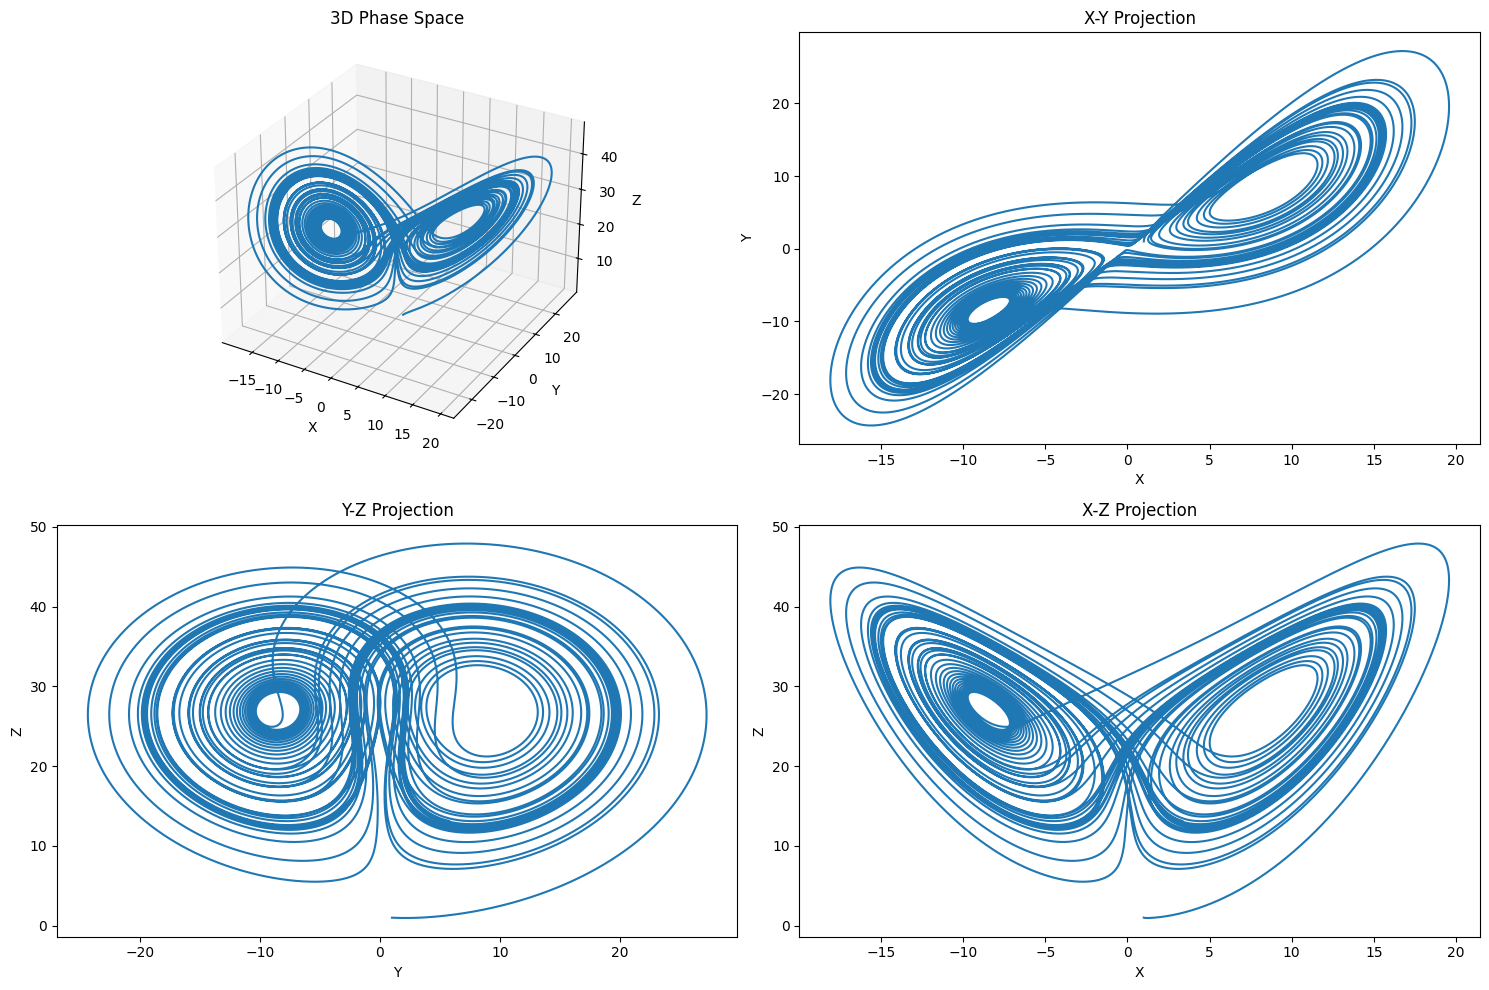

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Lorenz 63 system equations
def lorenz_63(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

# Parameters - this is the classic 
sigma = 10.0
rho = 28
beta = 8.0 / 3.0

# Time settings
dt = 0.0001
T = 50.0
N = int(T / dt)

# Initialize arrays to store time, state (x, y, z)
time_values = np.linspace(0, T, N)
state_values = np.zeros((N, 3))

# Initial conditions: x(0), y(0), z(0)
state_values[0] = [1.0, 1.0, 1.0]

# Time-stepping loop (Euler method)
for i in range(1, N):
    state_values[i] = state_values[i-1] + dt * lorenz_63(time_values[i-1], state_values[i-1], sigma, rho, beta)

# 3D Plotting
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot(state_values[:, 0], state_values[:, 1], state_values[:, 2])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('3D Phase Space')

# 2D Projections
ax2 = fig.add_subplot(222)
ax2.plot(state_values[:, 0], state_values[:, 1])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('X-Y Projection')

ax3 = fig.add_subplot(223)
ax3.plot(state_values[:, 1], state_values[:, 2])
ax3.set_xlabel('Y')
ax3.set_ylabel('Z')
ax3.set_title('Y-Z Projection')

ax4 = fig.add_subplot(224)
ax4.plot(state_values[:, 0], state_values[:, 2])
ax4.set_xlabel('X')
ax4.set_ylabel('Z')
ax4.set_title('X-Z Projection')

plt.tight_layout()
plt.show()


### Experiments

1) How do the 'classic' parameters $\sigma = 10$, $\rho = 28$, $\beta = \frac{8}{3}$ demonstrate chaos?
2) What happens when $\rho = 1$? What about when $\rho < 1$?
3) What happens to the structure of the attractor when $\sigma$ is varied?
4) What happens to the thickness of the attractor when $\beta   = 2$ or $\beta = 3$?
5) What is the importance of the initial conditions?
6) What happens if $\rho - 20?$ what about $\rho = 40$?
7) Use $\sigma = 10$ and $\beta = \frac{8}{3}$. Vary $\rho$, near the value of $48.5$. What happens?
8) Why might this inspire the term 'butterfly effect'?
9) Investigate the technique used (Euler method) to solve this equation in the code provided. How could this be improved, and why would that be important?
10) What is the effect of using a bigger value of $dt$?

### Summary

As we can see, perfect prediction isn't possible for a chaotic system. But that doesn't mean we can't learn something about the future with a good model. Where might this be applicable outside of weather forecasting?